In [1]:
%conda install matplotlib -y
%conda install seaborn -y
%pip install gdown

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Correlation Analysis using Python

### Data download

In [3]:
# Utilizing the dataets module in the sklearn library
from sklearn import datasets

data = datasets.load_diabetes()

In [4]:
display(data)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
# Converting to pandas DataFrame
example_data = pd.DataFrame(data['data'], index=data['target'], columns=data['feature_names'])
display(example_data)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
141.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
178.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
104.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
132.0,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
220.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


### Determining correlation between age and diabetes using scatterplot

Text(0, 0.5, 'Diabetes Mellitus')

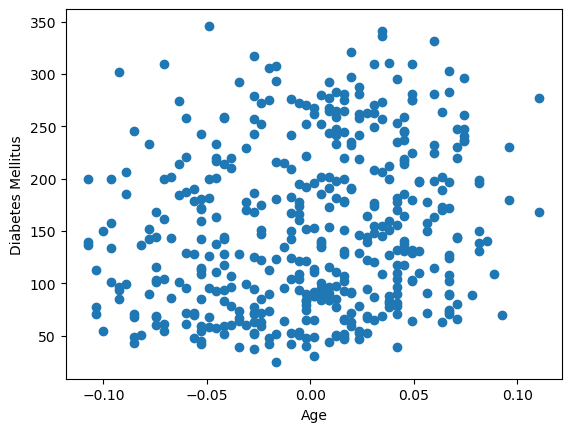

In [6]:
X = example_data.age.values
Y = example_data.index.values

plt.scatter(X, Y)
plt.xlabel('Age')
plt.ylabel('Diabetes Mellitus')

Observe this time the relationship between BMI and diabetes levels as there is no large linear relationship

Text(0, 0.5, 'Diabetes Mellitus')

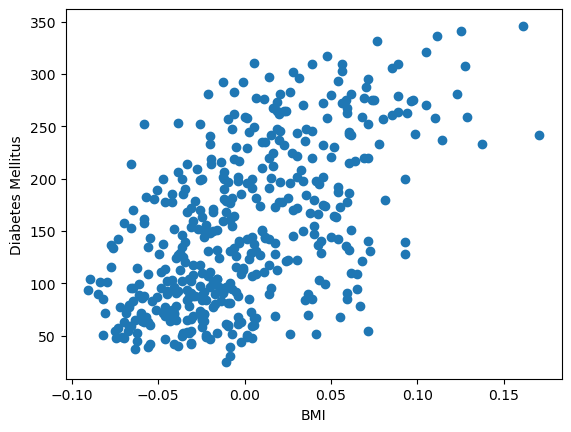

In [7]:
X = example_data.bmi.values
Y = example_data.index.values

plt.scatter(X, Y)
plt.xlabel('BMI')
plt.ylabel('Diabetes Mellitus')

### Covariance and Correlation Coefficient

- Samples and not populations were assumed.

In [8]:
#  Covariance Calculation
cov = (np.sum(X * Y) - (len(X) - 1) * np.mean(X) * np.mean(Y)) / (len(X) - 1)
cov

2.1529144226395425

In [9]:
# Utilize the cov() method of numpy
np.cov([X, Y])[0][1]

2.1529144226395425

In [10]:
# calculation of correlation function
ccef = cov / (np.std(X) * np.std(Y))
ccef

0.5877799533737241

In [11]:
# corrcoef() method of numpy
np.corrcoef([X, Y])[0][1]

0.5864501344746885

### Correlation coefficient test

- Assume to be a sample and not a population.

In [12]:
from scipy import stats
stats.pearsonr(X, Y)

PearsonRResult(statistic=0.5864501344746884, pvalue=3.466006445165805e-42)

=> Since the p-value is 3.46 X 10^(-42), it can be said that there is some distinct correlation between X and Y with very high reliability.

In [13]:
# Generating example data for Spearman correlation coefficient test
X_rank = pd.DataFrame(example_data['bmi'].rank())
Y_rank = pd.DataFrame(example_data.index).rank()

stats.spearmanr(X_rank, Y_rank)

SignificanceResult(statistic=0.5613820101065616, pvalue=4.5670239277250324e-38)

=> Similarly, since the p-value is 4.56 X 10^(-38), it can be said that there is some distinct correlation between X and Y with very high reliability.

## Practice

### Practice correlation analysis
- The following is data related to car accidents provided by the seaborn library.

In [14]:
car = sns.load_dataset('car_crashes')

In [15]:
car.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


- correlation between drinking and car crashes

Text(0, 0.5, 'Crashes')

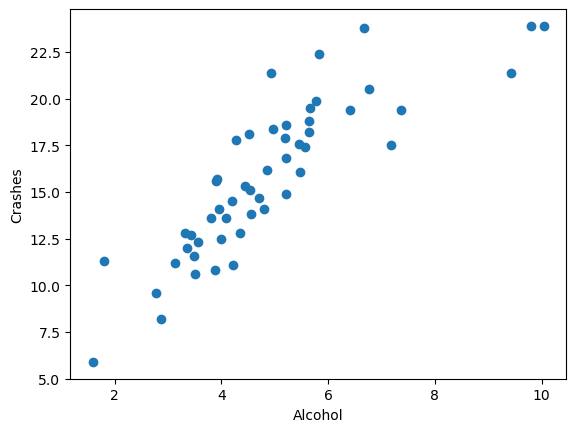

In [16]:
X = car.alcohol.values
Y = car.total.values

plt.scatter(X, Y)
plt.xlabel('Alcohol')
plt.ylabel('Crashes')

- Covariance and Correlation coefficient

In [17]:
cov = np.cov([X, Y])[0][1]
ccef = np.corrcoef([X, Y])[0][1]

print(f"공분산: {cov}, 상관 계수: {ccef}")

공분산: 6.076991843137255, 상관 계수: 0.8526132163334914


- Correlation analysis

In [18]:
from scipy import stats
stats.pearsonr(X, Y)

PearsonRResult(statistic=0.8526132163334912, pvalue=2.0355934480666658e-15)

Conclusion:  
The null hypothesis is **no correlation between drinking and car traffic accidents** and the alternative hypothesis is **correlated between the two** when,
Since the p-value is 2.04 X 10^(-15), it can be said that **there is a clear correlation between drinking and car traffic accidents** with high reliability.